#**Sujet :** Impact de l'IA sur le marché de l'emploi (2024-2030)


**Description :**

Ce projet explore l'impact croissant de l'adoption de l'Intelligence Artificielle (IA) sur le marché du travail mondial. Il examine en détail comment cette technologie transforme les métiers, en se concentrant sur les métiers en augmentation ou en diminution en raison de l'IA, les compétences requises et leur évolution face à l'automatisation..





> Data Source :https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030/code

# **Phase 1 — Business Understanding**

| BO  |   DSO (one precise objective) | Type  | Model examples     |
| --- | ------------------------- | -------------- | ------------------------ |
| **BO1: Aide les entreprises à anticiper les métiers à recruter et adapter leurs plans RH et formation** | Classifier des métiers selon trajectoire 2024→2030(croissance / stable / déclin). | Classification | Random Forest, XGBoost, Logistic Regression |
| **BO2: Permet aux professionnels et aux entreprises de planifier la reconversion et les formations adaptées** | Estimer le % de risque d’automatisation pour chaque métier. | Regression | Gradient Boosting Regressor , Random Forest Regressor|
| **BO3: Aligner les programmes éducatifs sur les besoins futurs du marché du travail** |Regrouper métiers selon signaux de marché pour aligner programmes éducatifs.Identifier des groupes homogènes de métiers selon :le niveau de salaire,le risque d’automatisation,les compétences requises (niveau d’éducation, impact IA),et les dynamiques du marché (offres 2024 → 2030). | Clustering |   K-Means on TF-IDF, HDBSCAN |
| **BO4: Aider les multinationales à choisir les implantations pour le recrutement et l’investissement** | Prévoir le nombre de postes ouverts par pays/secteur en 2030. | Regression | Linear Regression, Random Forest Regressor, XGBoost Regressor |
| **BO5: Permettre aux candidats et aux entreprises de prioriser les métiers stables et rémunérateurs** | Classer la stabilité d’un métier (stable vs à risque de déclin). | Classification | Logistic Regression, Random Forest, XGBoost|
| **BO6: Aider les entreprises à planifier le télétravail et les politiques RH flexibles** | Estimer faisabilité et impact du télétravail par métier  | Classification | Logistic Regression , Random Forest |




# **Phase 2 — Data Understanding**

**IMPORT DES LIBRAIRIES ET CHARGEMENT DES DONNÉES**




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer


In [2]:
INPUT_CSV = "ai_job_trends_dataset.csv"    # adjust path if needed
OUTPUT_PREPARED_CSV = "prepared_data.csv"  # saved BEFORE PCA
OUTPUT_PCA_CSV = "dataset_reduit.csv"      # saved AFTER PCA

# Load the data
df = pd.read_csv("data/ai_job_trends_dataset.csv")

# --- BASIC DESCRIPTION ---
print("Dimensions", df.shape)
df.head(5)

Dimensions (30000, 13)


Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

# **Analyse exploratoire**

In [3]:
print("Colonnes:", df.columns.tolist())
print(f"\nTypes de données:\n{df.dtypes}")

Colonnes: ['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)']

Types de données:
Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object


In [4]:
df.info()
# Affichez les statistiques descriptives des variables numériques.
print("\nStatistiques descriptives:\n")
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

count unique                  top   freq  \
Job Title                      30000    639  Surveyor, insurance     75   
Industry                       30000      8        Entertainment   3895   
Job Status                     30000      2           Increasing  15136   
AI Impact Level                30000      3             Moderate  10042   
Median Salary (USD)          30000.0    NaN                  NaN    NaN   
Required Education             30000      5    Bachelor’s Degree   6146   
Experience Required (Years)  30000.0    NaN                  NaN    NaN   
Job Openings (2024)          30000.0    NaN                  NaN    NaN   
Projected Openings (2030)    30000.0    NaN                  NaN    NaN   
Remote Work Ratio (%)        30000.0    NaN                  NaN    NaN   
Automation Risk (%)          30000.0    NaN                  NaN    NaN   
Location                       30000      8            Australia   3802   
Gender Diversity (%)         30000.0    NaN                  NaN    NaN   

                                     mean           std       min         25%  \
Job Title                             NaN           NaN       NaN         NaN   
Industry                              NaN           NaN       NaN         NaN   
Job Status                            NaN           NaN       NaN         NaN   
AI Impact Level                       NaN           NaN       NaN         NaN   
Median Salary (USD)          90119.965639  34412.013953  30001.86  60500.7025   
Required Education                    NaN           NaN       NaN         NaN   
Experience Required (Years)     10.051433      6.060678       0.0         5.0   
Job Openings (2024)           5039.640833   2861.009654     100.0      2570.0   
Projected Openings (2030)       5074.2181   2866.550722     100.0     2586.75   
Remote Work Ratio (%)           49.836431     28.966688       0.0       24.57   
Automation Risk (%)             50.154229     28.754889       0.0        25.4   
Location                              NaN           NaN       NaN         NaN   
Gender Diversity (%)             49.97966     17.274665      20.0       35.07   

                                   50%        75%       max  
Job Title                          NaN        NaN       NaN  
Industry                           NaN        NaN       NaN  
Job Status                         NaN        NaN       NaN  
AI Impact Level                    NaN        NaN       NaN  
Median Salary (USD)          90274.115  119454.71  149998.5  
Required Education                 NaN        NaN       NaN  
Experience Required (Years)       10.0       15.0      20.0  
Job Openings (2024)             5034.0     7527.0   10000.0  
Projected Openings (2030)       5106.5     7573.0   10000.0  
Remote Work Ratio (%)            49.57       75.1     100.0  
Automation Risk (%)              50.02      75.03     99.99  
Location                           NaN        NaN       NaN  
Gender Diversity (%)            49.885      64.91      80.0

**Répartition et distributions**

In [5]:
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

# Pourcentage entre 0 et 100
percent_cols = ["Remote_Work_Ratio_%","Automation_Risk_%","Gender_Diversity_%"]
for col in percent_cols:
    df[col] = df[col].clip(lower=0, upper=100)

num_cols = df.select_dtypes(include=[np.number]).columns
# Aucune valeur négative dans les colonnes numériques
for col in num_cols:
    if (df[col] < 0).any():
        print(f"⚠️ Valeurs négatives détectées dans {col}")
# Standardiser les noms de colonnes
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

In [6]:
quantitative_cols = df.select_dtypes(include=[np.number]).columns

qualitative_cols = df.select_dtypes(include=['object']).columns


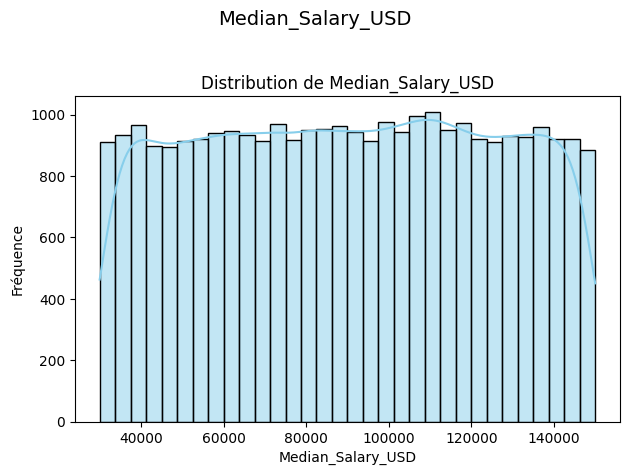

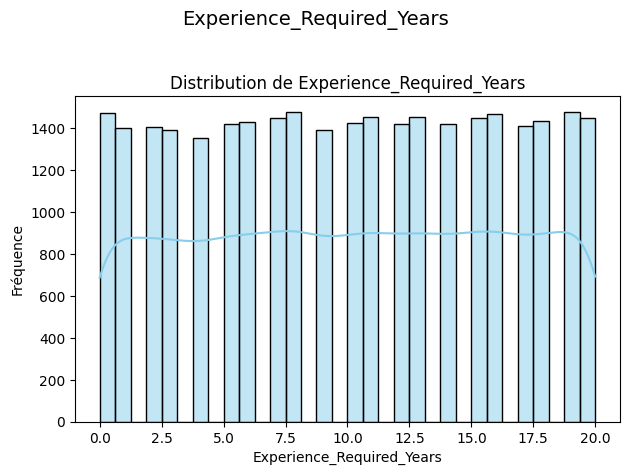

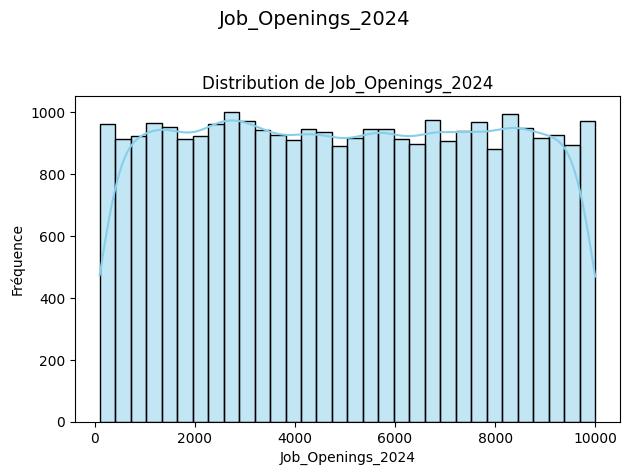

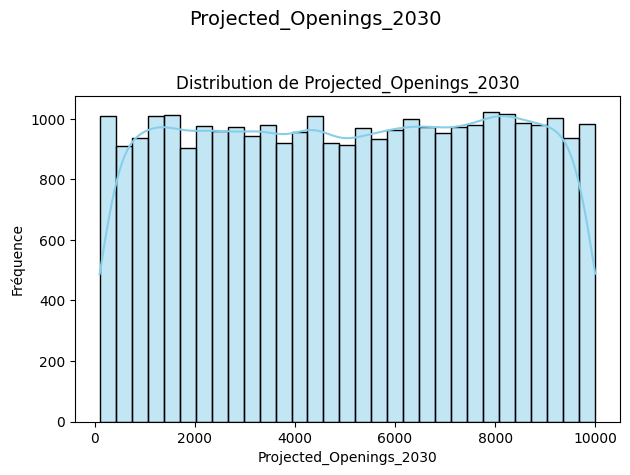

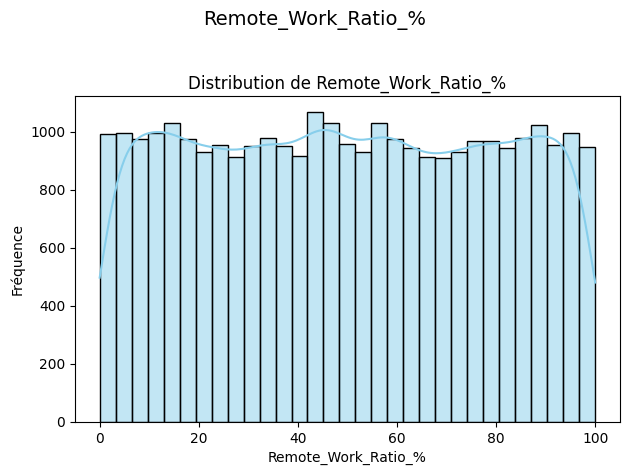

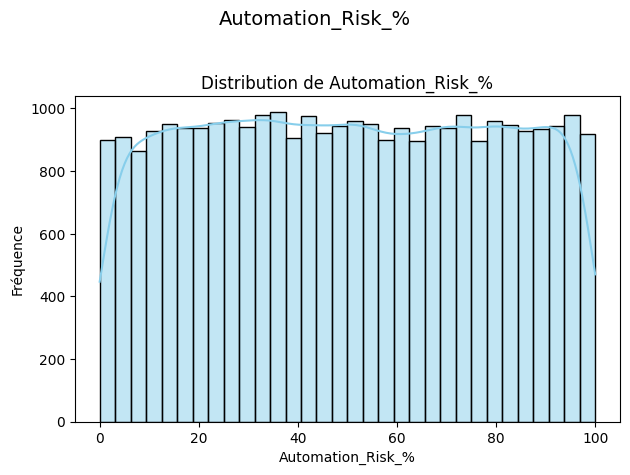

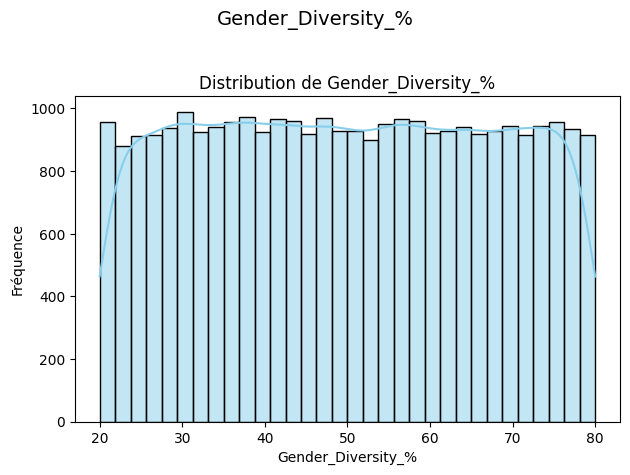

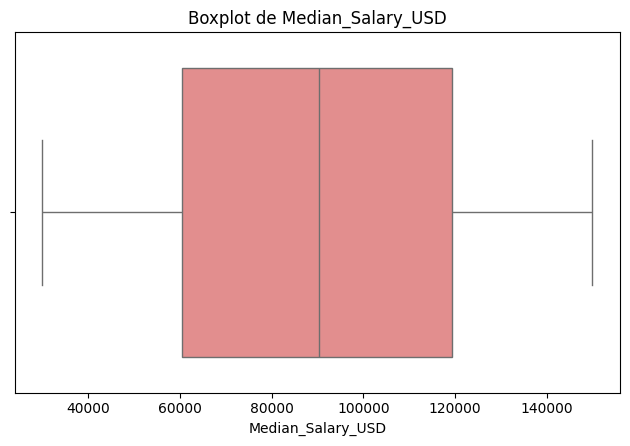

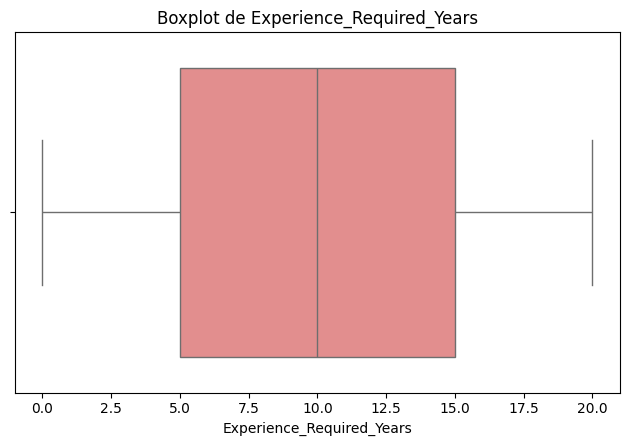

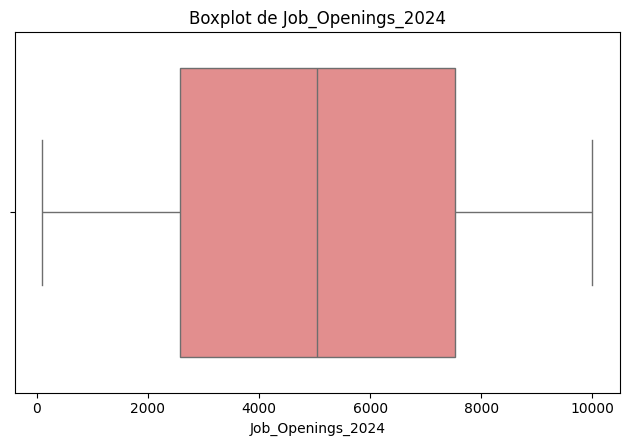

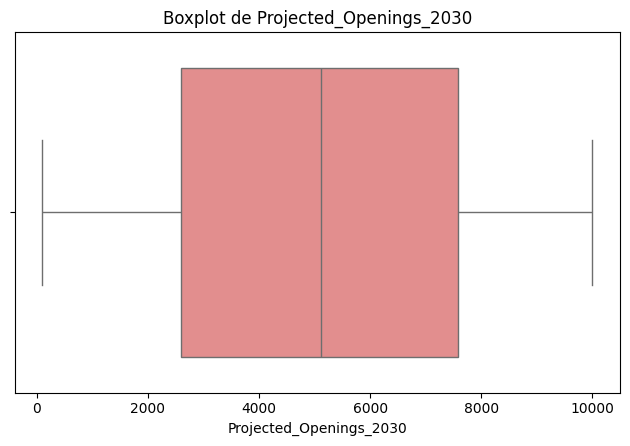

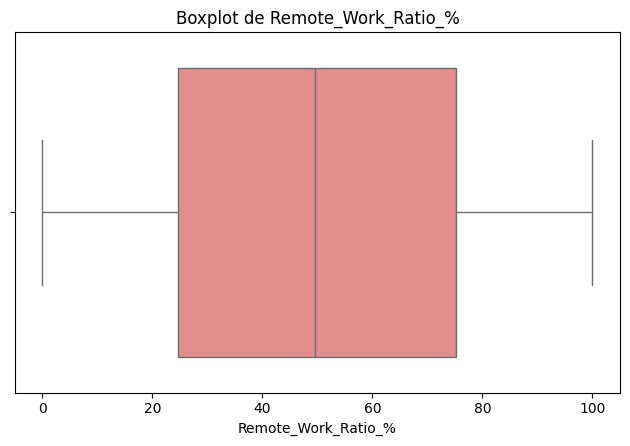

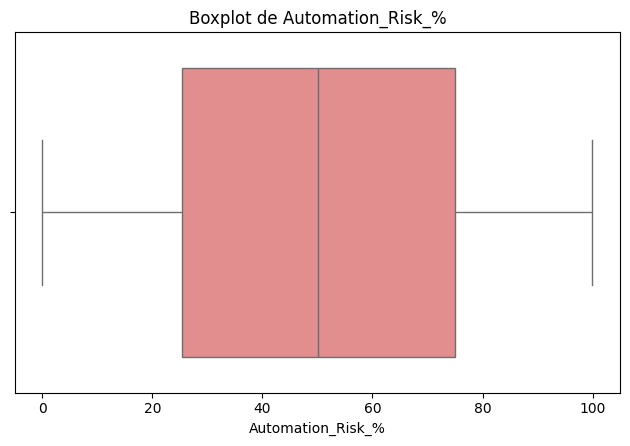

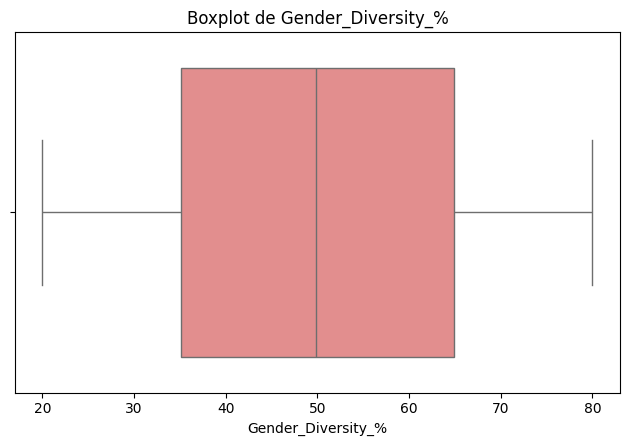

In [7]:
# --- Histogrammes + Boxplots pour variables numériques ---
for col in quantitative_cols:
    plt.figure()
    plt.suptitle(f"{col}", fontsize=14)
    # Histogramme
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
for col in quantitative_cols:
    # Boxplot
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot de {col}")

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

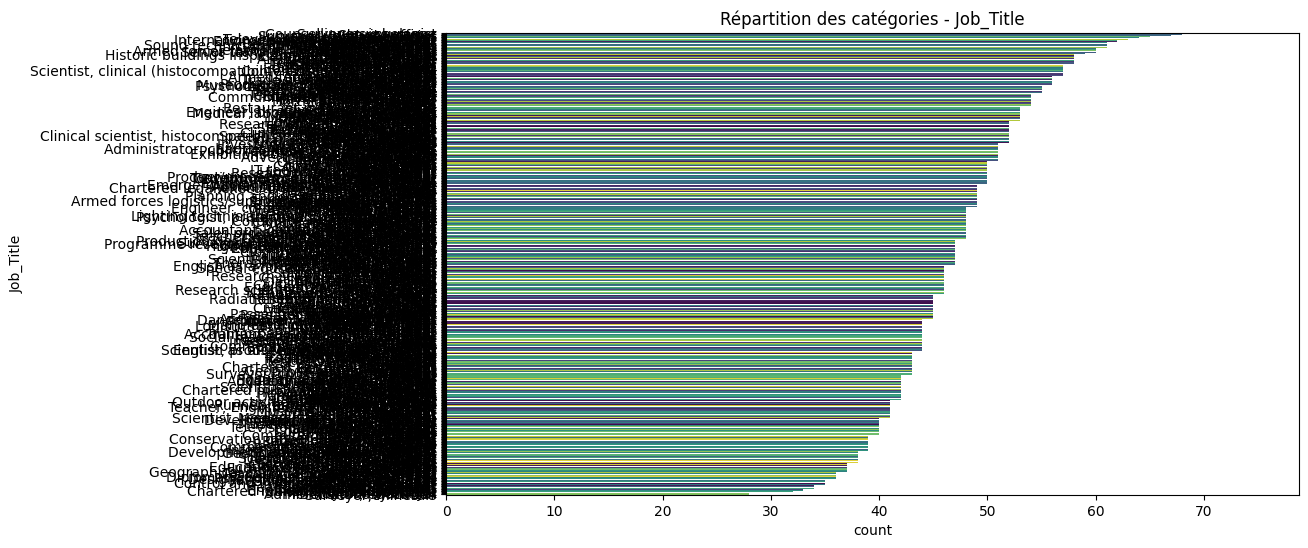

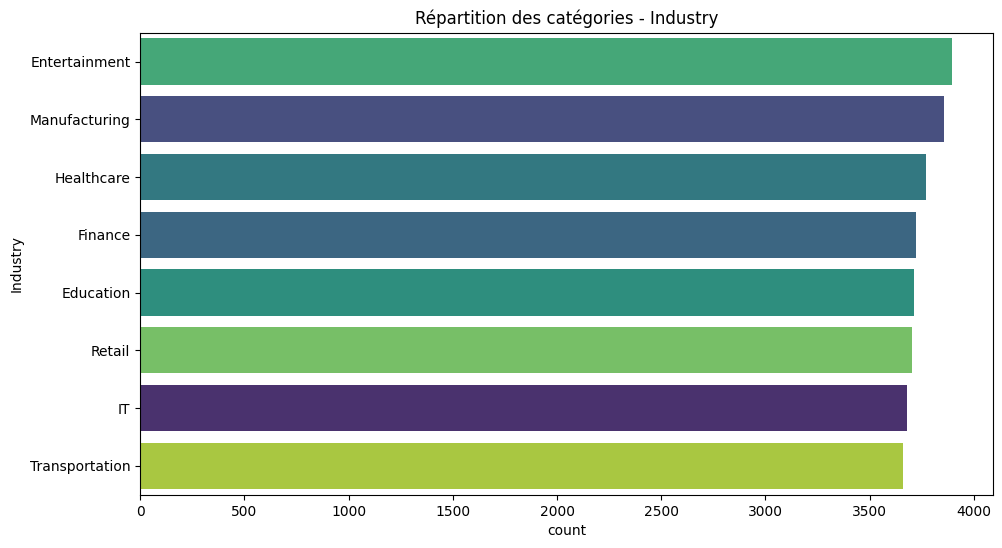

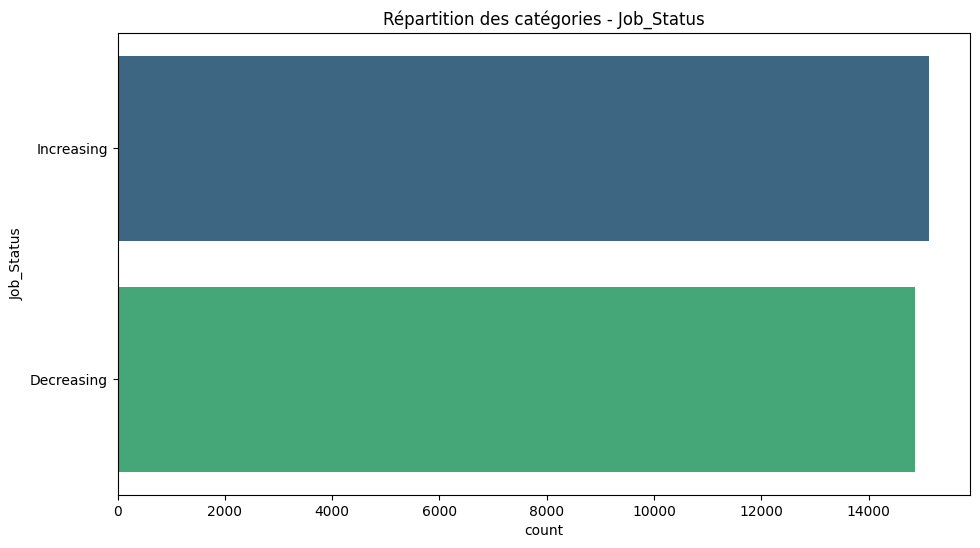

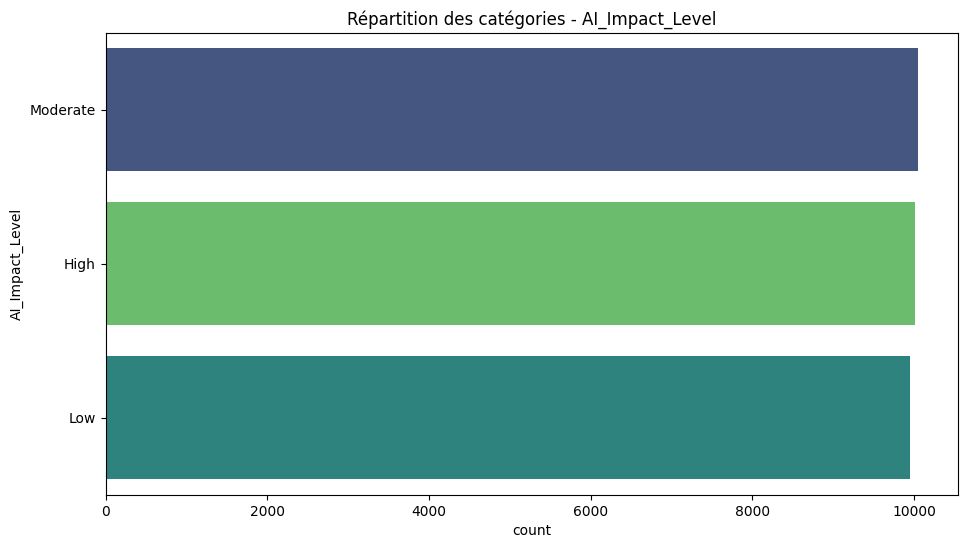

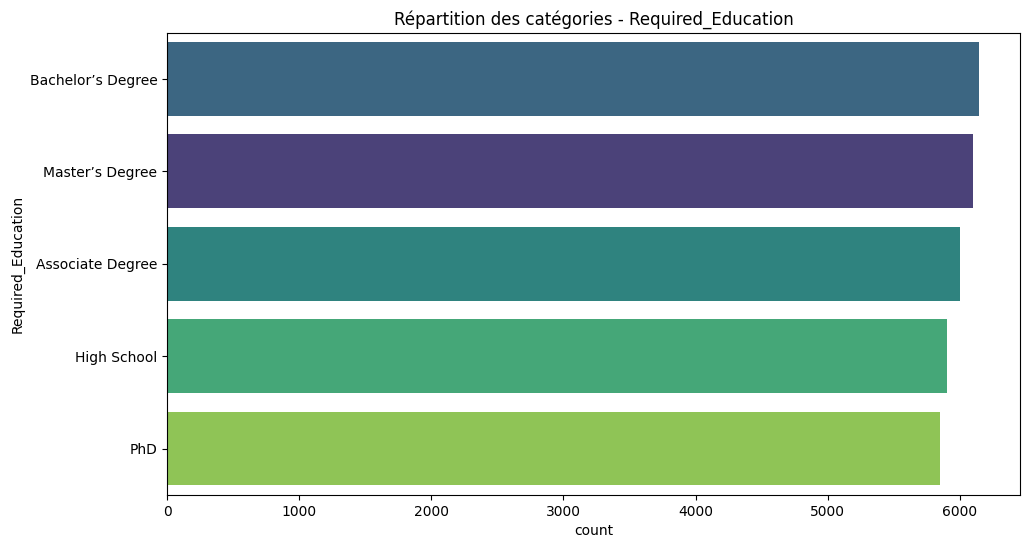

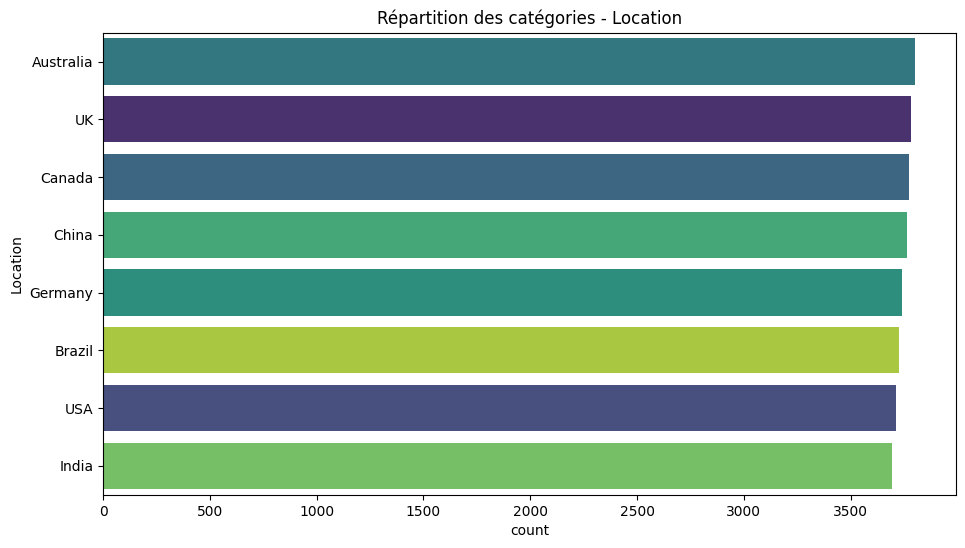

In [8]:
# --- Barplots pour variables catégorielles ---
for col in qualitative_cols:
    plt.figure(figsize=(11,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col],palette="viridis", legend=False)
    plt.title(f"Répartition des catégories - {col}")
    plt.show()

**Qualité des données**

**Valeurs manquantes**

In [9]:
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    'Valeurs manquantes': missing_count,
    '% manquantes': missing_pct.round(2)
})
display(missing_summary)

Valeurs manquantes  % manquantes
Job_Title                                   0           0.0
Industry                                    0           0.0
Job_Status                                  0           0.0
AI_Impact_Level                             0           0.0
Median_Salary_USD                           0           0.0
Required_Education                          0           0.0
Experience_Required_Years                   0           0.0
Job_Openings_2024                           0           0.0
Projected_Openings_2030                     0           0.0
Remote_Work_Ratio_%                         0           0.0
Automation_Risk_%                           0           0.0
Location                                    0           0.0
Gender_Diversity_%                          0           0.0

**Doublons et Valeurs uniques**

In [10]:
print("\nUnique values per column:")
print(df.nunique(dropna=False))

# Duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nLignes dupliquées: {duplicate_rows}")


Unique values per column:
Job_Title                      639
Industry                         8
Job_Status                       2
AI_Impact_Level                  3
Median_Salary_USD            29968
Required_Education               5
Experience_Required_Years       21
Job_Openings_2024             9439
Projected_Openings_2030       9410
Remote_Work_Ratio_%           9466
Automation_Risk_%             9519
Location                         8
Gender_Diversity_%            5965
dtype: int64

Lignes dupliquées: 0


In [11]:
print("\nTop 5 valeurs les plus fréquentes (catégorielles) :")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} :")
    print(df[col].value_counts(dropna=False).head())


Top 5 valeurs les plus fréquentes (catégorielles) :

Job_Title :
Job_Title
Surveyor, insurance         75
Counselling psychologist    70
Charity officer             68
Surveyor, land/geomatics    67
Hydrogeologist              66
Name: count, dtype: int64

Industry :
Industry
Entertainment    3895
Manufacturing    3855
Healthcare       3771
Finance          3721
Education        3714
Name: count, dtype: int64

Job_Status :
Job_Status
Increasing    15136
Decreasing    14864
Name: count, dtype: int64

AI_Impact_Level :
AI_Impact_Level
Moderate    10042
High        10005
Low          9953
Name: count, dtype: int64

Required_Education :
Required_Education
Bachelor’s Degree    6146
Master’s Degree      6097
Associate Degree     6003
High School          5900
PhD                  5854
Name: count, dtype: int64

Location :
Location
Australia    3802
UK           3784
Canada       3775
China        3763
Germany      3741
Name: count, dtype: int64


**VISUALISATIONS EXPLORATOIRES**

C:\Users\meria\AppData\Local\Temp\ipykernel_17520\4201899207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AI_Impact_Level', y='Median_Salary_USD', data=df, palette='Set2')


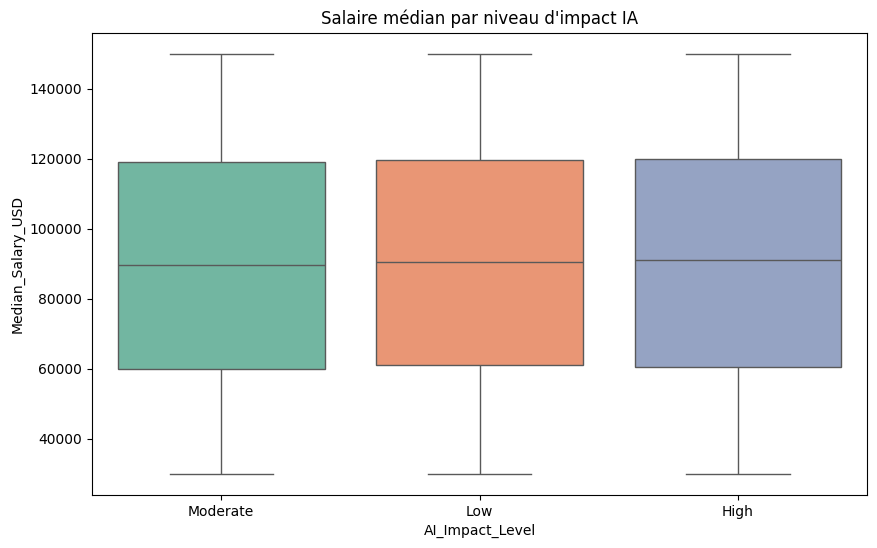

In [12]:
#def create_advanced_visualizations(df):

# Distribution des Niveaux d'Impact de l'IA
plt.figure(figsize=(10,6))
sns.boxplot(x='AI_Impact_Level', y='Median_Salary_USD', data=df, palette='Set2')
plt.title("Salaire médian par niveau d'impact IA")
plt.show()

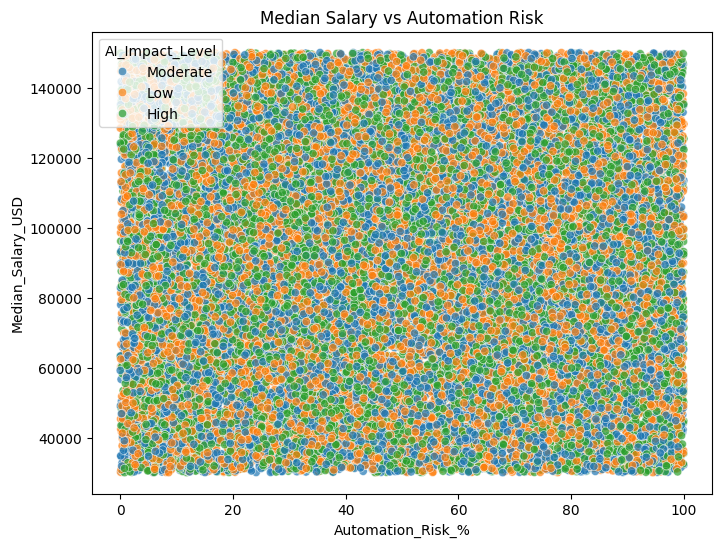

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Automation_Risk_%', y='Median_Salary_USD', hue='AI_Impact_Level', data=df, alpha=0.7)
plt.title("Median Salary vs Automation Risk")
plt.show()


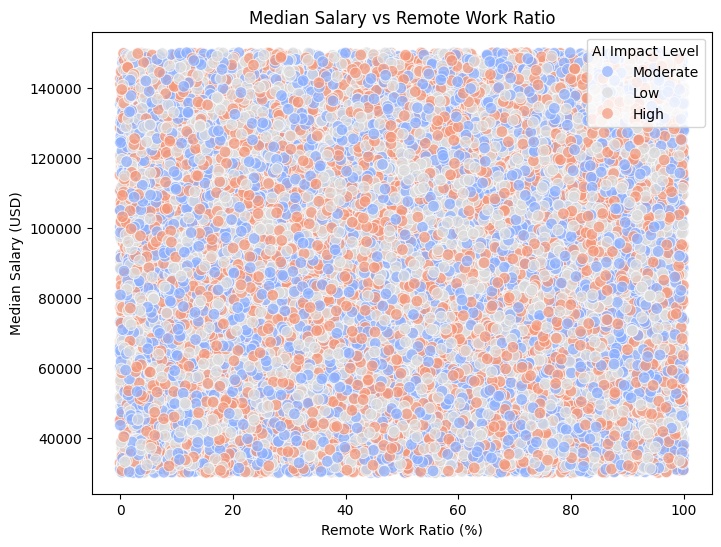

In [14]:
# Salaire vs Télétravail
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Remote_Work_Ratio_%",
    y="Median_Salary_USD",
    hue="AI_Impact_Level",
    palette="coolwarm",
    alpha=0.7, s=70
)
plt.title("Median Salary vs Remote Work Ratio")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Median Salary (USD)")
plt.legend(title="AI Impact Level")
plt.show()

C:\Users\meria\AppData\Local\Temp\ipykernel_17520\2588750775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


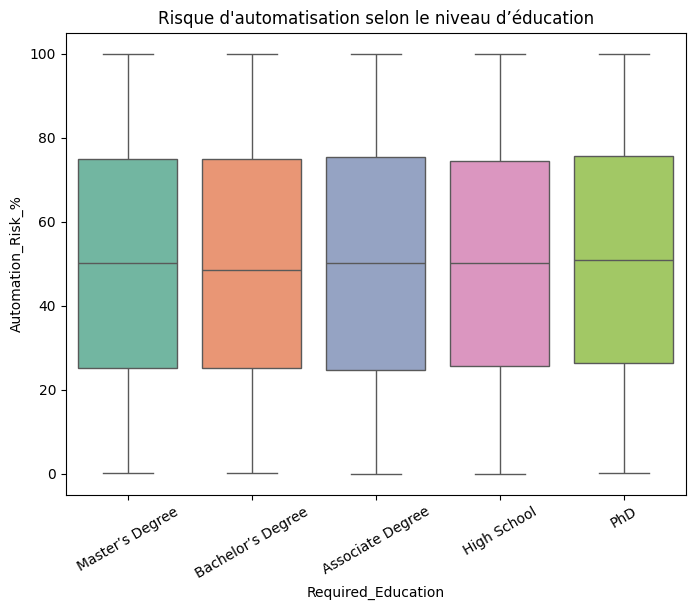

In [15]:
# Automatisation vs Éducation
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Required_Education",
    y="Automation_Risk_%",
    palette="Set2"
)
plt.xticks(rotation=30)
plt.title("Risque d'automatisation selon le niveau d’éducation")
plt.xlabel("Required_Education")
plt.ylabel("Automation_Risk_%")
plt.show()

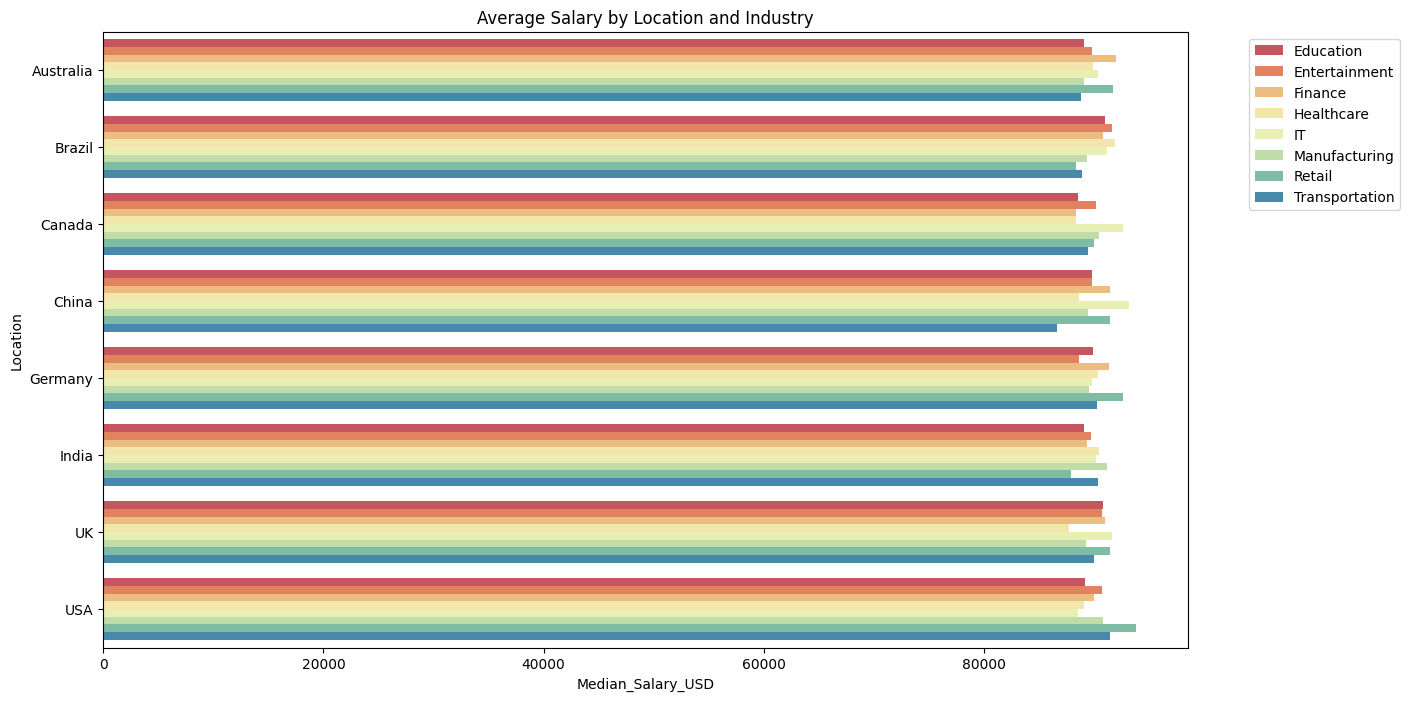

In [16]:
# Salaire moyen par pays et industrie
grouped = df.groupby(['Location', 'Industry'])['Median_Salary_USD'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Median_Salary_USD', y='Location', hue='Industry', palette='Spectral')
plt.title("Average Salary by Location and Industry")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Matrice de corrélation**

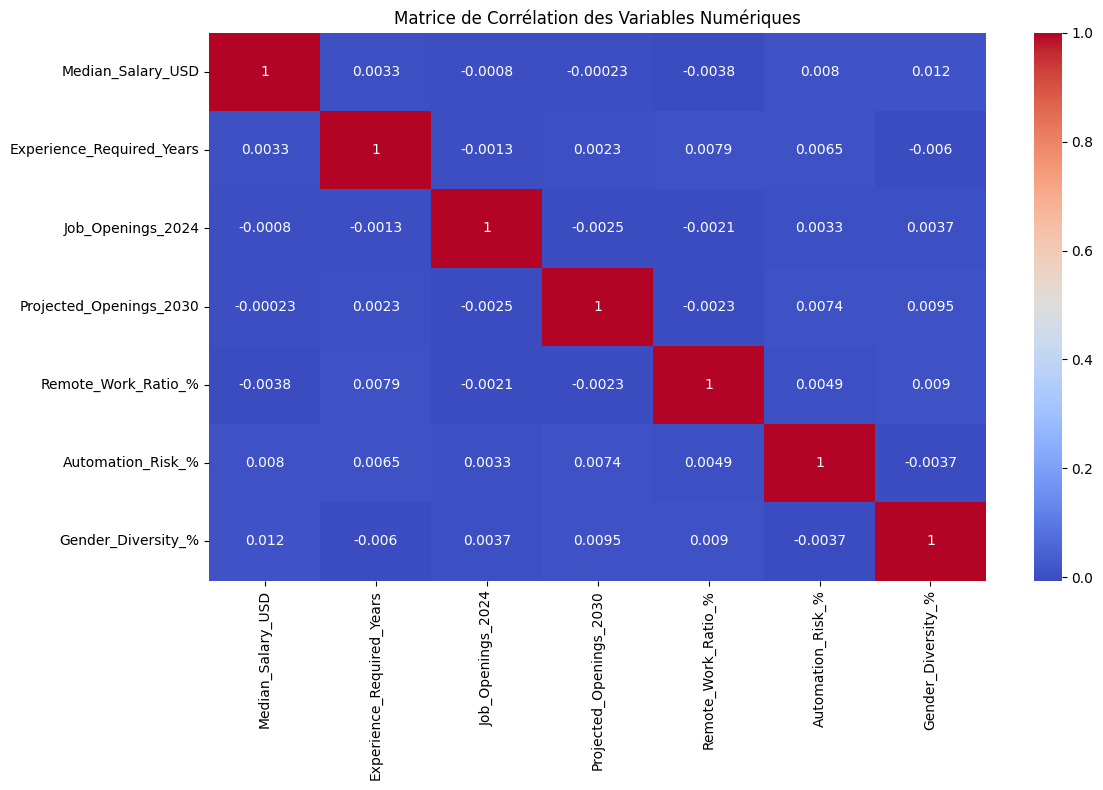

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[quantitative_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()



# **DATA PREPARATION - NETTOYAGE ET PRÉPARATION**



> Pas de valeurs manquantes, ni doublons.
  Les outliers numériques sont traités par IQR capping (on réduit leur influence sans les supprimer).

> Nettoie les noms de colonnes : supprime espaces et parenthèses → pas de KeyError.
> Supprime les colonnes redondantes
> Crée une nouvelle feature : 
     Job_Growth_Rate_% = taux de croissance des jobs entre 2024 et 2030.
> Encodage One-Hot pour toutes les variables catégorielles.

> Standardisation des colonnes numériques (moyenne 0, écart-type 1).

> Retourne un DataFrame prêt pour PCA ou ML, sans erreur de nom de colonne.


**Nettoyage des données**

In [18]:
#TRAITEMENT DES VALEURS MANQUANTES
df_clean = df.copy()

missing_before = df_clean.isnull().sum()
print(f"Valeurs manquantes avant traitement:\n{missing_before[missing_before > 0]}")

# Vérification et traitement des valeurs manquantes
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            # Pour les numériques: médiane (plus robuste aux outliers)
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            # Pour les catégorielles: mode ou 'unknown'
            df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'unknown', inplace=True)

# Traitement des doublons
print(f"Doublons avant suppression: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Doublons après suppression: {df_clean.duplicated().sum()}")


Valeurs manquantes avant traitement:
Series([], dtype: int64)
Doublons avant suppression: 0
Doublons après suppression: 0


In [19]:
def outliers_iqr(df, cols=None):
    df2 = df.copy()
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df2[col] = np.where(df2[col] < lower, lower, df2[col])
        df2[col] = np.where(df2[col] > upper, upper, df2[col])
    return df2
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_clean = outliers_iqr(df_clean, cols=numeric_cols)
print("capped shape:", df_clean.shape)


capped shape: (30000, 13)


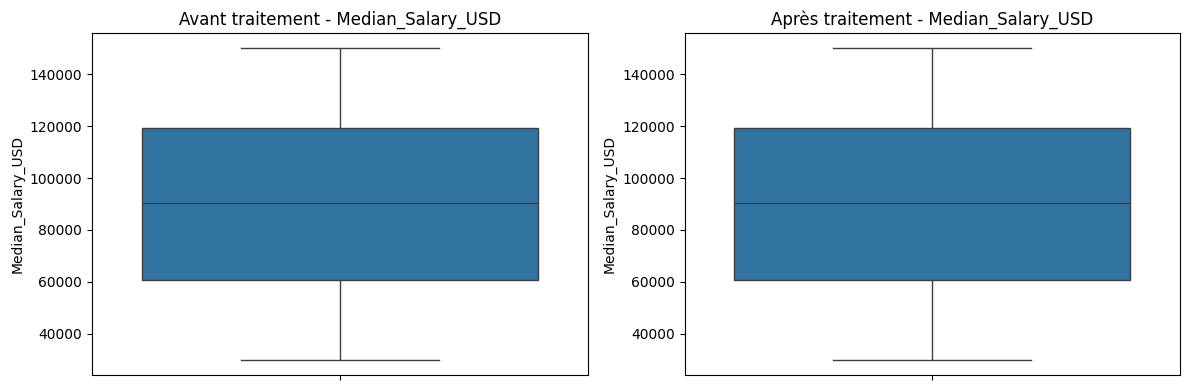

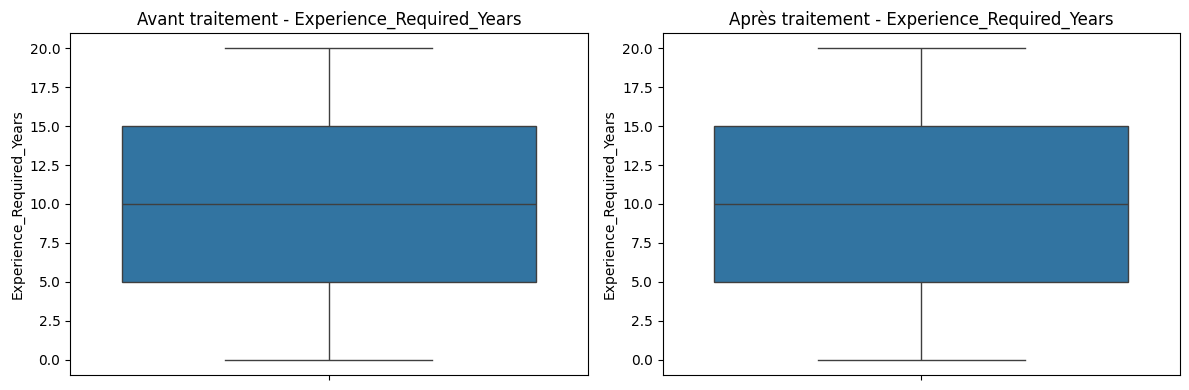

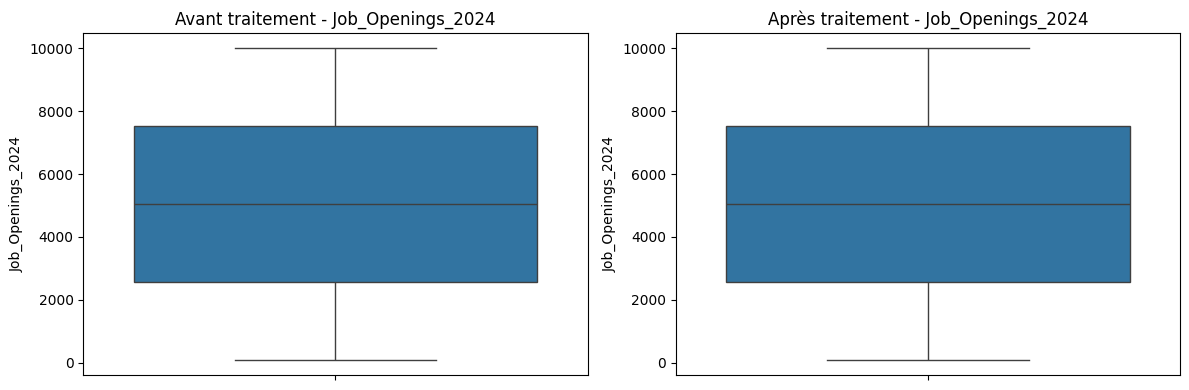

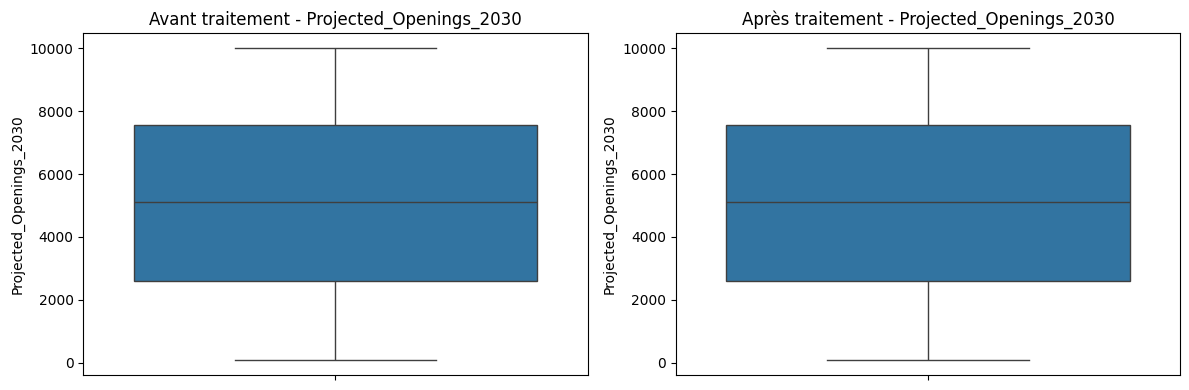

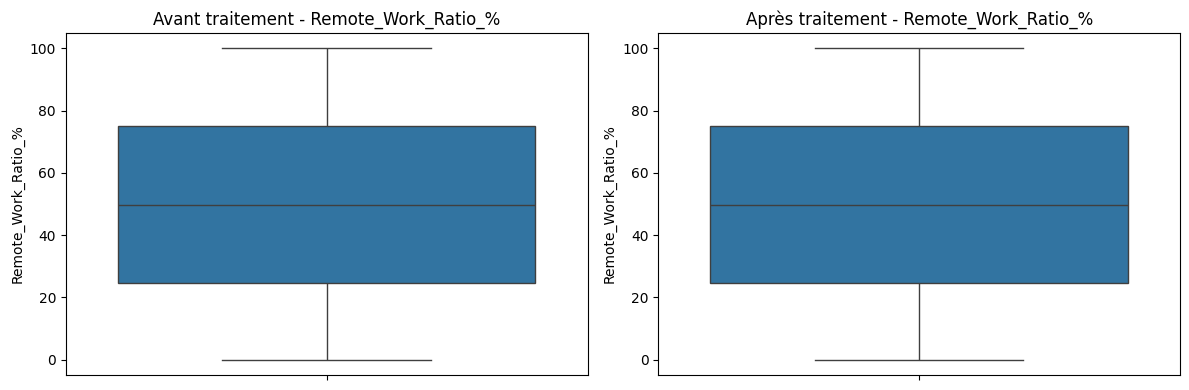

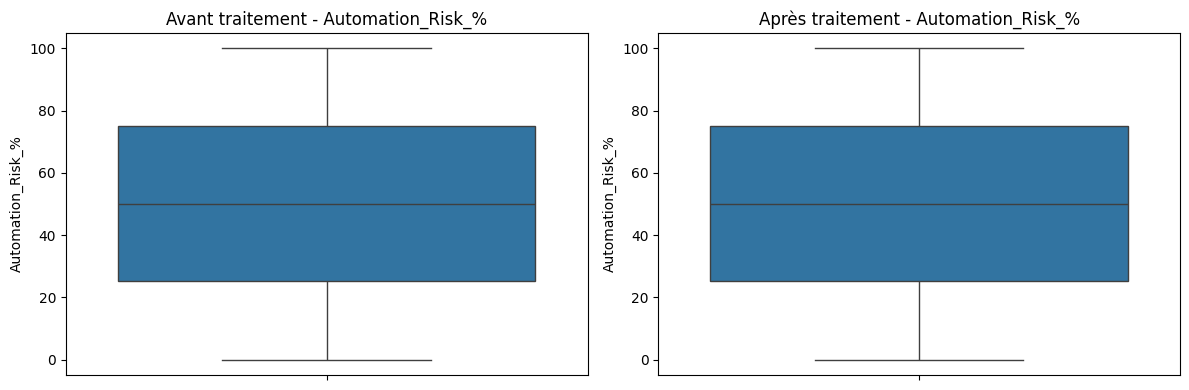

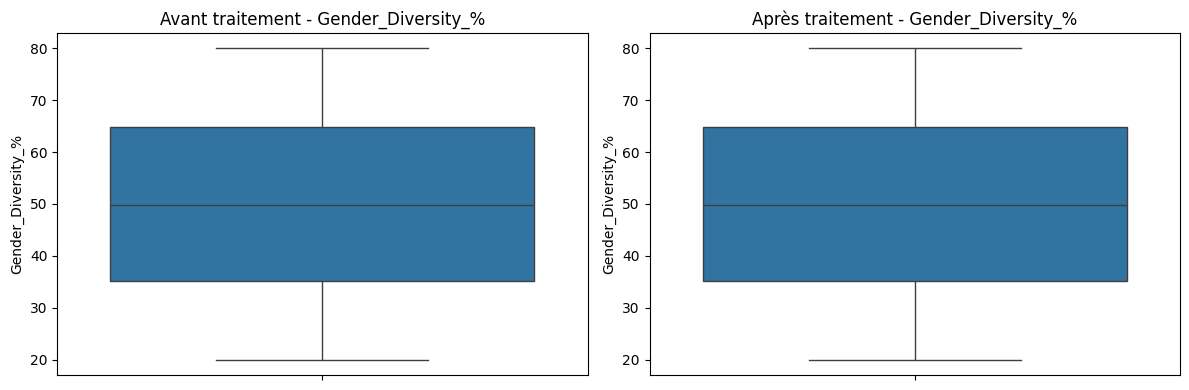

In [20]:
# Visualisation avant/après traitement des outliers
for col in numeric_cols :
    if col in df_clean.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        sns.boxplot(y=df[col], ax=ax1)
        ax1.set_title(f'Avant traitement - {col}')
        sns.boxplot(y=df_clean[col], ax=ax2)
        ax2.set_title(f'Après traitement - {col}')
        plt.tight_layout()
        plt.show()


**Feature engineering**

In [21]:
def feature_engineering(df):
    df_fe = df_clean.copy()

    # Growth metrics
    # Feature dérivée : croissance du nombre d’emplois 
    df_fe["Job_Growth_Rate_%"] = ((df_fe["Projected_Openings_2030"] - df_fe["Job_Openings_2024"]) 
                                / df_fe["Job_Openings_2024"]) * 100
    df_fe['Job_Growth_Rate_%'] = df_fe['Job_Growth_Rate_%'].fillna(0)

    # Suppression des colonnes redondantes
    df_fe.drop(columns=["Job_Openings_2024", "Projected_Openings_2030"], inplace=True)
   

    # Growth categories
    def classify_growth(g):
        if g < -10: return 'decline'
        elif g < 10: return 'stable'
        else: return 'high_growth'

    df_fe['Growth_Category'] = df_fe['Job_Growth_Rate_%'].apply(classify_growth)

    # Composite indices
    df_fe['Vulnerability_Index'] = (df_fe['Automation_Risk_%'] *
                                   (100 - df_fe['Remote_Work_Ratio_%']) / 100)
    # Job stability score
    df_fe['Job_Stability_Score'] = (100 - df_fe['Automation_Risk_%']) + df_fe['Job_Growth_Rate_%']
    num_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df_fe.select_dtypes(include=['object']).columns.tolist()

    print("Colonnes numériques :", num_cols)
    print("Colonnes catégorielles :", cat_cols)
    print(df_fe.shape)
    return df_fe
df_engineered = feature_engineering(df_clean)


Colonnes numériques : ['Median_Salary_USD', 'Experience_Required_Years', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Gender_Diversity_%', 'Job_Growth_Rate_%', 'Vulnerability_Index', 'Job_Stability_Score']
Colonnes catégorielles : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Required_Education', 'Location', 'Growth_Category']
(30000, 15)


**Data Transformation**

In [22]:
from sklearn.compose import ColumnTransformer

def preprocess_pipeline(df):
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
    le = LabelEncoder()
    df_proc = df_clean.copy()
    df_proc.columns = df_proc.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
    # 1. ORDINAL ENCODING (variables with natural order)
    education_mapping = {"high school":1, "associate degree":2, "bachelor's degree":3,
                         "master's degree":4, "phd":5, "unknown":2}
    ai_impact_mapping = {"low": 1, "moderate": 2, "high": 3, "unknown": 0}
    job_status_mapping = {"decreasing": 0, "increasing": 1, "unknown": 0.5}

    df_proc['Education_Num'] = df_proc['Required_Education'].map(education_mapping).fillna(2)
    df_proc['AI_Impact_Num'] = df_proc['AI_Impact_Level'].map(ai_impact_mapping).fillna(2)
    df_proc['Job_Status_Num'] = df_proc['Job_Status'].map(job_status_mapping).fillna(0.5)


    # 3. Drop original categorical columns to avoid duplication
    cols_to_drop = ['Required_Education', 'AI Impact Level', 'Job Status']
    df_proc.drop(columns=[c for c in cols_to_drop if c in df_proc.columns], inplace=True)
    num_cols = df_proc.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df_proc.select_dtypes(include=['object']).columns.tolist()

    print("Colonnes numériques :", num_cols)
    print("Colonnes catégorielles :", cat_cols)
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ])

    X_prepared = preprocessor.fit_transform(df_proc)
    

    num_features = num_cols
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
    all_features = list(num_features) + list(cat_features)



    df_ready = pd.DataFrame(X_prepared, columns=all_features)
    np.save("X_prepared.npy", X_prepared)
    print("✅ X_prepared saved successfully with shape", X_prepared.shape)

    return df_ready, preprocessor
df_ready, fitted_preprocessor = preprocess_pipeline(df_engineered)

df_ready.to_csv('processed_data.csv', index=False)



Colonnes numériques : ['Median_Salary_USD', 'Experience_Required_Years', 'Job_Openings_2024', 'Projected_Openings_2030', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Gender_Diversity_%', 'Education_Num', 'AI_Impact_Num', 'Job_Status_Num']
Colonnes catégorielles : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Location']
✅ X_prepared saved successfully with shape (30000, 665)


In [23]:
# Save the prepared dataset (BEFORE PCA)
df_ready.to_csv(OUTPUT_PREPARED_CSV, index=False)
print(f"💾 Prepared dataset saved: {OUTPUT_PREPARED_CSV}")
print(f"📊 Final shape: {df_ready.shape}")
print(f"Original dataset: {df.shape}")
print(f"After cleaning: {df_clean.shape}")
print(f"After encoding: {df_ready.shape}")
print(f"Total features reduced by: {((df.shape[1] - df_ready.shape[1]) / df.shape[1] * 100):.1f}%")
df_ready.head(5)

💾 Prepared dataset saved: prepared_data.csv
📊 Final shape: (30000, 665)
Original dataset: (30000, 13)
After cleaning: (30000, 13)
After encoding: (30000, 665)
Total features reduced by: -5015.4%


Median_Salary_USD  Experience_Required_Years  Job_Openings_2024  \
0          -1.395182                  -0.833491          -1.231978   
1           1.225715                   0.816517          -1.327050   
2           1.544813                  -0.998491          -0.594779   
3           0.216677                   0.816517           0.745679   
4          -0.847490                   0.486516           0.316103   

   Projected_Openings_2030  Remote_Work_Ratio_%  Automation_Risk_%  \
0                 0.442275             0.211404          -0.760726   
1                 0.394481            -1.140171           1.375642   
2                -1.367596             1.449398           0.793470   
3                -0.353817            -1.655254           1.731413   
4                 0.809970             0.135453          -0.434863   

   Gender_Diversity_%  Education_Num  AI_Impact_Num  Job_Status_Num  ...  \
0           -0.309688            0.0            0.0             0.0  ...   
1            0.949982            0.0            0.0             0.0  ...   
2           -0.512300            0.0            0.0             0.0  ...   
3            0.913511            0.0            0.0             0.0  ...   
4            1.307737            0.0            0.0             0.0  ...   

   Job_Status_Increasing  AI_Impact_Level_Low  AI_Impact_Level_Moderate  \
0                    1.0                  0.0                       1.0   
1                    1.0                  0.0                       1.0   
2                    1.0                  1.0                       0.0   
3                    1.0                  0.0                       0.0   
4                    1.0                  1.0                       0.0   

   Location_Brazil  Location_Canada  Location_China  Location_Germany  \
0              0.0              0.0             0.0               0.0   
1              0.0              0.0             0.0               0.0   
2              0.0              1.0             0.0               0.0   
3              0.0              0.0             0.0               0.0   
4              0.0              0.0             0.0               1.0   

   Location_India  Location_UK  Location_USA  
0             0.0          1.0           0.0  
1             0.0          0.0           1.0  
2             0.0          0.0           0.0  
3             0.0          0.0           0.0  
4             0.0          0.0           0.0  

[5 rows x 665 columns]

In [24]:

# Distribution des nouvelles features



# **PCA**

🔢 Numeric features for PCA: 665
📊 Total variance explained by selected components: 95.01%
🎯 Number of components selected: 299


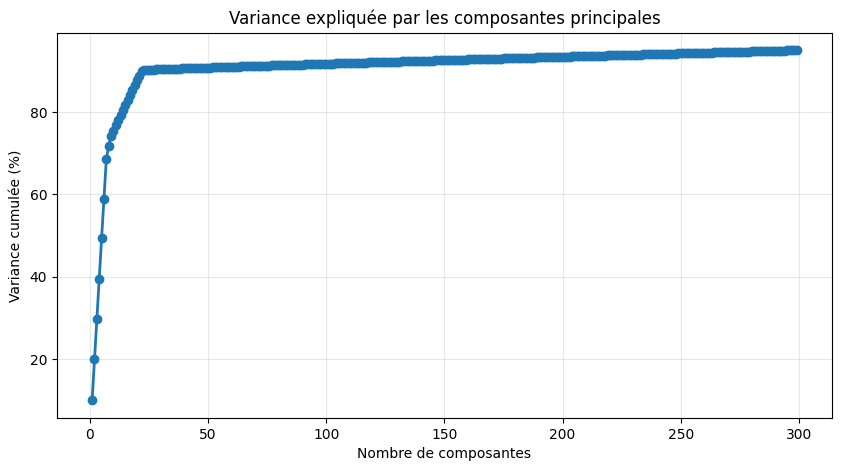

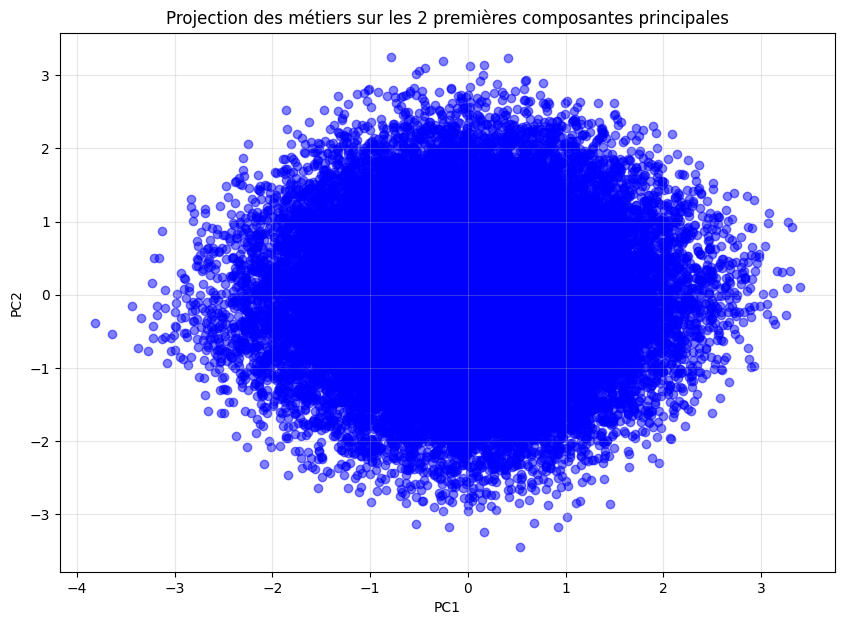


🔝 Top 10 features contributing to PC1:
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381
AI_Impact_Level_Moderate   0.003493  0.005342
Location_Brazil            0.003383  0.000940
🎯 COMPREHENSIVE PCA ANALYSIS
📊 Data for PCA: 30000 rows x 665 features

📈 Tableau des variances expliquées:
   Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            1.018821                  9.97                   9.97
1       Dim2            1.011966                  9.90                  19.87
2       Dim3            1.005022                  9.83                  29.70
3       Dim4            1.002050  

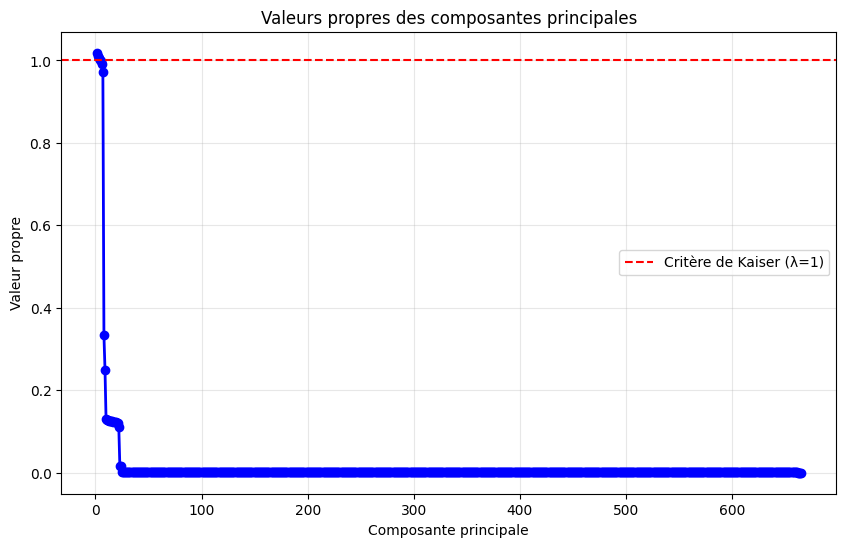


🔝 Top 10 features contributing to PC1 (comprehensive):
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381
AI_Impact_Level_Moderate   0.003493  0.005342
Location_Brazil            0.003383  0.000940


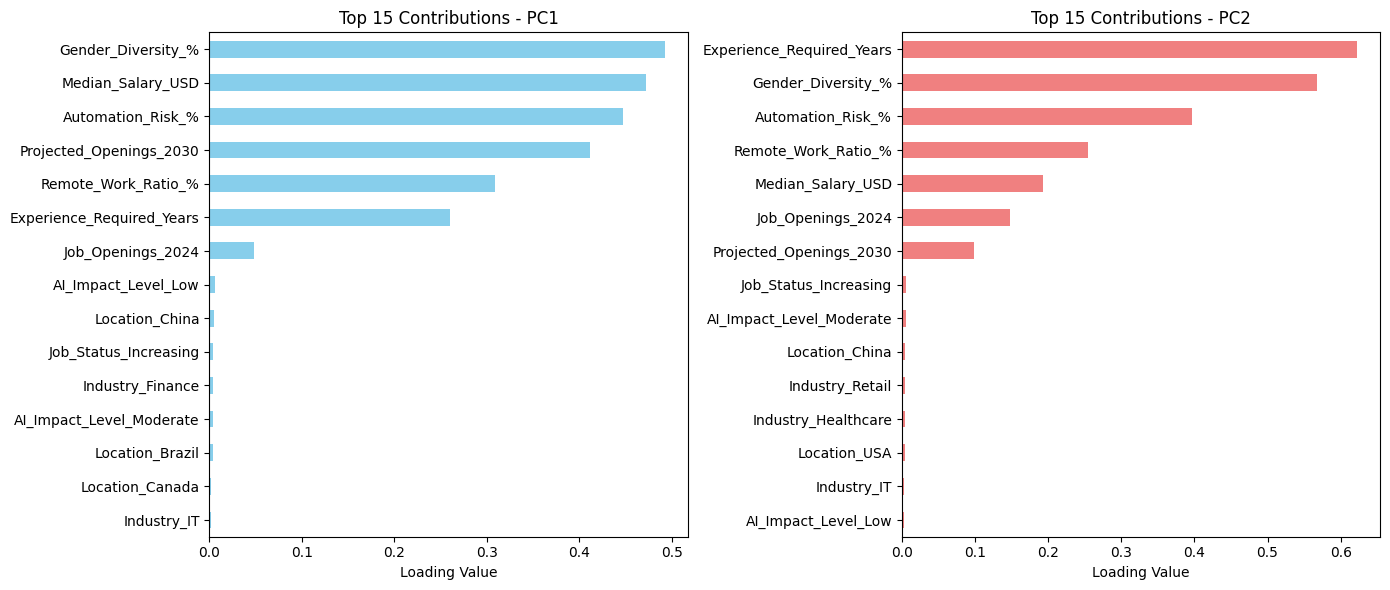

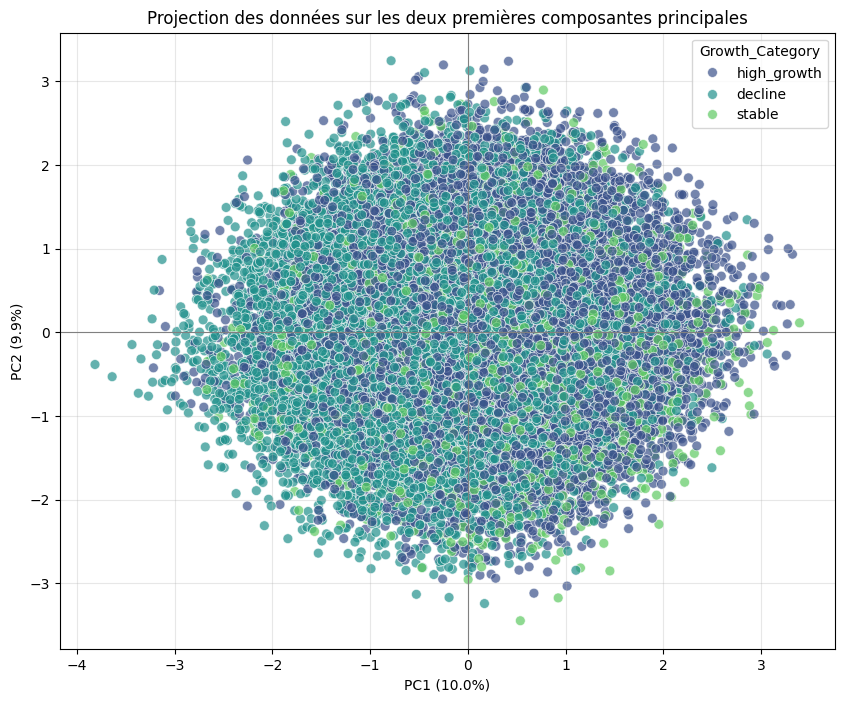


🎯 Recommendation finale: 4 composantes
📊 Variance expliquée: 39.5%
💾 Dataset réduit sauvegardé: dataset_reduit.csv

FINAL PCA RESULTS SUMMARY
Simple PCA shape: (30000, 299)
Comprehensive PCA shape: (30000, 9)
Original features: 665
Reduction: 98.6%

📋 Top features from Simple PCA:
                                PC1       PC2
Gender_Diversity_%         0.492227 -0.567178
Median_Salary_USD          0.471717 -0.193009
Automation_Risk_%          0.447510  0.396536
Projected_Openings_2030    0.411850 -0.097999
Remote_Work_Ratio_%        0.308757  0.253954
Experience_Required_Years  0.259839  0.622697
Job_Openings_2024          0.048097 -0.147627
Job_Status_Increasing      0.003951  0.005381
AI_Impact_Level_Moderate   0.003493  0.005342
Location_Brazil            0.003383  0.000940

📋 Comprehensive PCA Dataset:


PC1       PC2       PC3       PC4              Job_Title  \
0 -1.171058 -0.179163  0.968941 -1.481716     Investment analyst   
1  1.626458  0.149965 -1.242855 -1.082302  Journalist, newspaper   
2  0.419570  0.277766  0.350576  0.861145      Financial planner   
3  0.921450  0.144996 -1.728397  0.746368        Legal secretary   
4  0.565968 -0.544543  0.830676 -0.296741  Aeronautical engineer   

  Growth_Category  Automation_Risk_%   Location       Industry  
0     high_growth              28.28         UK             IT  
1     high_growth              89.71        USA  Manufacturing  
2         decline              72.97     Canada        Finance  
3         decline              99.94  Australia     Healthcare  
4     high_growth              37.65    Germany             IT

In [25]:
# **PCA ANALYSIS - FIXED VERSION**

# ======= SIMPLE PCA (MATCHING YOUR EXPECTED OUTPUT) ======= 
def simple_pca(df_ready, n_components=0.95):
    """
    Perform PCA on numeric features and reduce dimensionality.
    n_components: float for % variance explained, or int for number of components
    """
    # 1. Keep only numeric columns
    df_numeric = df_ready.select_dtypes(include=[np.number]).fillna(0)
    print(f"🔢 Numeric features for PCA: {df_numeric.shape[1]}")
    
    # 2. Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df_numeric)
    
    # 3. Print variance explained
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    print(f"📊 Total variance explained by selected components: {cum_var[-1]*100:.2f}%")
    print(f"🎯 Number of components selected: {X_pca.shape[1]}")
    
    # 4. Scree plot / cumulative variance (like your example)
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(cum_var)+1), cum_var*100, marker='o', linewidth=2)
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance cumulée (%)')
    plt.title('Variance expliquée par les composantes principales')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5. Scatter plot first two PCs (like your example)
    plt.figure(figsize=(10,7))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='blue')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Projection des métiers sur les 2 premières composantes principales')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 6. Feature contributions (like your example)
    pca_features = pd.DataFrame(pca.components_[:2], 
                               columns=df_numeric.columns, 
                               index=['PC1','PC2']).T
    
    print("\n🔝 Top 10 features contributing to PC1:")
    print(pca_features.sort_values(by='PC1', ascending=False).head(10))
    
    # 7. Return PCA-transformed dataset
    df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    return df_pca, pca, pca_features

# ======= COMPREHENSIVE PCA ANALYSIS =======
def comprehensive_pca_analysis(df_ready, df_engineered):
    """
    Perform complete PCA analysis with all TP-style visualizations
    """
    print("="*60)
    print("🎯 COMPREHENSIVE PCA ANALYSIS")
    print("="*60)
    
    # 1) Prepare data for PCA
    df_pca_input = df_ready.select_dtypes(include=[np.number]).fillna(0)
    X = df_pca_input.values
    feature_names = df_pca_input.columns.tolist()
    print(f"📊 Data for PCA: {X.shape[0]} rows x {X.shape[1]} features")
    
    # 2) Apply PCA
    pca = PCA()
    pca_components = pca.fit_transform(X)
    
    # 3) Explained variance table
    explained_variance = pca.explained_variance_ratio_
    eig = pd.DataFrame({
        "Dimension": [f"Dim{i+1}" for i in range(len(explained_variance))],
        "Variance expliquée": pca.explained_variance_,
        "% variance expliquée": np.round(explained_variance * 100, 2),
        "% cum. var. expliquée": np.round(np.cumsum(explained_variance) * 100, 2)
    })
    print("\n📈 Tableau des variances expliquées:")
    print(eig.head(15))
    
    # 4) Scree plot with Kaiser criterion
    eigenvalues = pca.explained_variance_
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b', linewidth=2)
    plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser (λ=1)')
    plt.title("Valeurs propres des composantes principales")
    plt.xlabel("Composante principale")
    plt.ylabel("Valeur propre")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5) Variable contributions (Loadings) - FIXED to match your format
    loadings = pca.components_.T  # Use raw components like your example
    
    # Create the exact same format as your example
    pca_features_comprehensive = pd.DataFrame(pca.components_[:2], 
                                             columns=feature_names, 
                                             index=['PC1','PC2']).T
    
    print("\n🔝 Top 10 features contributing to PC1 (comprehensive):")
    print(pca_features_comprehensive.sort_values(by='PC1', ascending=False).head(10))
    
    # Plot contributions for first two components
    plt.figure(figsize=(14, 6))
    
    # PC1 contributions (top 15)
    plt.subplot(1, 2, 1)
    top_pc1 = pca_features_comprehensive['PC1'].abs().sort_values(ascending=False).head(15)
    top_pc1.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Top 15 Contributions - PC1')
    plt.xlabel('Loading Value')
    
    # PC2 contributions (top 15)
    plt.subplot(1, 2, 2)
    top_pc2 = pca_features_comprehensive['PC2'].abs().sort_values(ascending=False).head(15)
    top_pc2.sort_values().plot(kind='barh', color='lightcoral')
    plt.title('Top 15 Contributions - PC2')
    plt.xlabel('Loading Value')
    
    plt.tight_layout()
    plt.show()
    
    # 6) Projection on first two principal components
    pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
    
    # Add metadata for coloring if available
    metadata_options = ['Growth_Category', 'AI_Impact_Level', 'Industry']
    for meta in metadata_options:
        if meta in df_engineered.columns:
            pca_df[meta] = df_engineered[meta].values
            break
    
    plt.figure(figsize=(10, 8))
    if 'Growth_Category' in pca_df.columns:
        sns.scatterplot(x='PC1', y='PC2', hue='Growth_Category', data=pca_df, palette='viridis', s=50, alpha=0.7)
    else:
        sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Projection des données sur les deux premières composantes principales')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 7) Component selection and final dataset
    n_kaiser = (pca.explained_variance_ > 1).sum()
    n_85 = int(np.argmax(np.cumsum(explained_variance) >= 0.85) + 1)
    recommended = min(n_kaiser, n_85) if n_kaiser > 0 else n_85
    
    print(f"\n🎯 Recommendation finale: {recommended} composantes")
    print(f"📊 Variance expliquée: {np.cumsum(explained_variance)[recommended-1]*100:.1f}%")
    
    # Create final reduced dataset
    pca_reduced = pca_components[:, :recommended]
    reduced_cols = [f'PC{i+1}' for i in range(recommended)]
    dataset_reduit = pd.DataFrame(pca_reduced, columns=reduced_cols)
    
    # Add important metadata
    metadata_to_add = ['Job_Title', 'Growth_Category', 'Automation_Risk_%', 'Location', 'Industry']
    for meta in metadata_to_add:
        if meta in df_engineered.columns:
            dataset_reduit[meta] = df_engineered[meta].values
    
    # Save results
    dataset_reduit.to_csv(OUTPUT_PCA_CSV, index=False)
    print(f"💾 Dataset réduit sauvegardé: {OUTPUT_PCA_CSV}")
    
    return dataset_reduit, pca, pca_features_comprehensive

df_pca_simple, pca_simple, pca_features_simple = simple_pca(df_ready, n_components=0.95)

print("="*40)
dataset_reduit, pca_model, pca_features_comprehensive = comprehensive_pca_analysis(df_ready, df_engineered)

# Display final results
print("\n" + "="*50)
print("FINAL PCA RESULTS SUMMARY")
print("="*50)
print(f"Simple PCA shape: {df_pca_simple.shape}")
print(f"Comprehensive PCA shape: {dataset_reduit.shape}")
print(f"Original features: {df_ready.select_dtypes(include=[np.number]).shape[1]}")
print(f"Reduction: {((df_ready.select_dtypes(include=[np.number]).shape[1] - dataset_reduit.shape[1]) / df_ready.select_dtypes(include=[np.number]).shape[1] * 100):.1f}%")

print("\n📋 Top features from Simple PCA:")
print(pca_features_simple.sort_values(by='PC1', ascending=False).head(10))

print("\n📋 Comprehensive PCA Dataset:")
dataset_reduit.head()

🚀 SIMPLE PCA ANALYSIS
🔢 Numeric features for PCA: 665
📊 Total variance explained by selected components: 95.01%
🎯 Number of components selected: 299


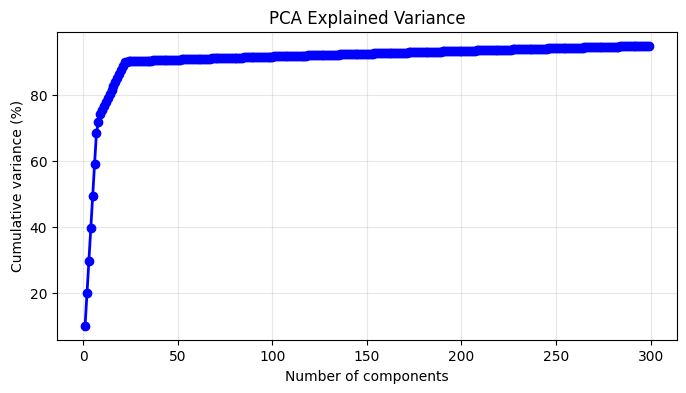

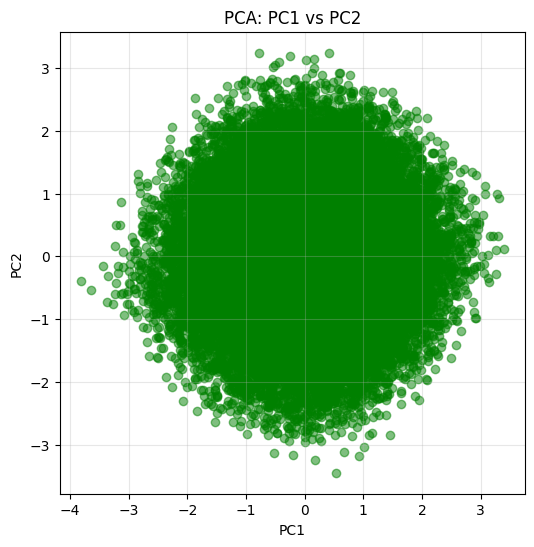


🚀 COMPREHENSIVE PCA ANALYSIS
🎯 COMPREHENSIVE PCA ANALYSIS
📊 Data for PCA: 30000 rows x 665 features

📈 Tableau des variances expliquées:
   Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            1.018821                  9.97                   9.97
1       Dim2            1.011966                  9.90                  19.87
2       Dim3            1.005022                  9.83                  29.70
3       Dim4            1.002050                  9.80                  39.50
4       Dim5            0.999786                  9.78                  49.28
5       Dim6            0.990889                  9.69                  58.98
6       Dim7            0.972569                  9.51                  68.49
7       Dim8            0.333279                  3.26                  71.75
8       Dim9            0.249998                  2.45                  74.20
9      Dim10            0.130066                  1.27                  75.47
10  

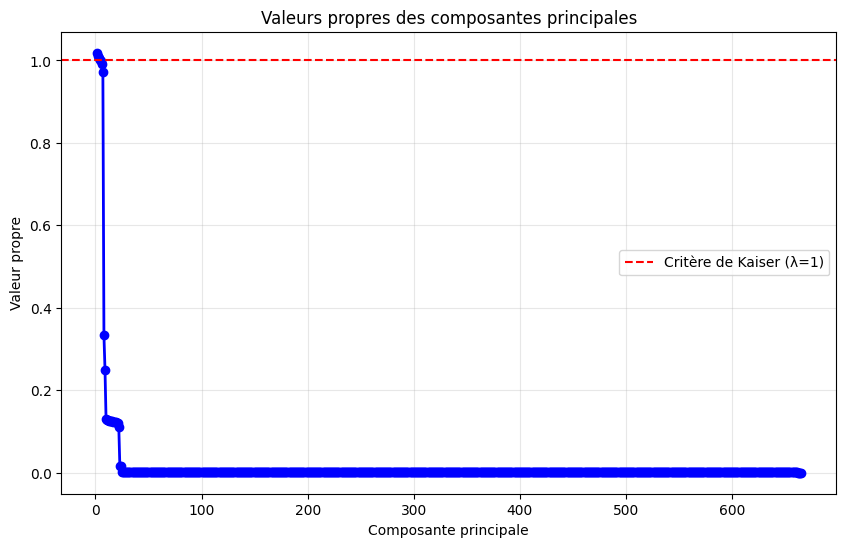

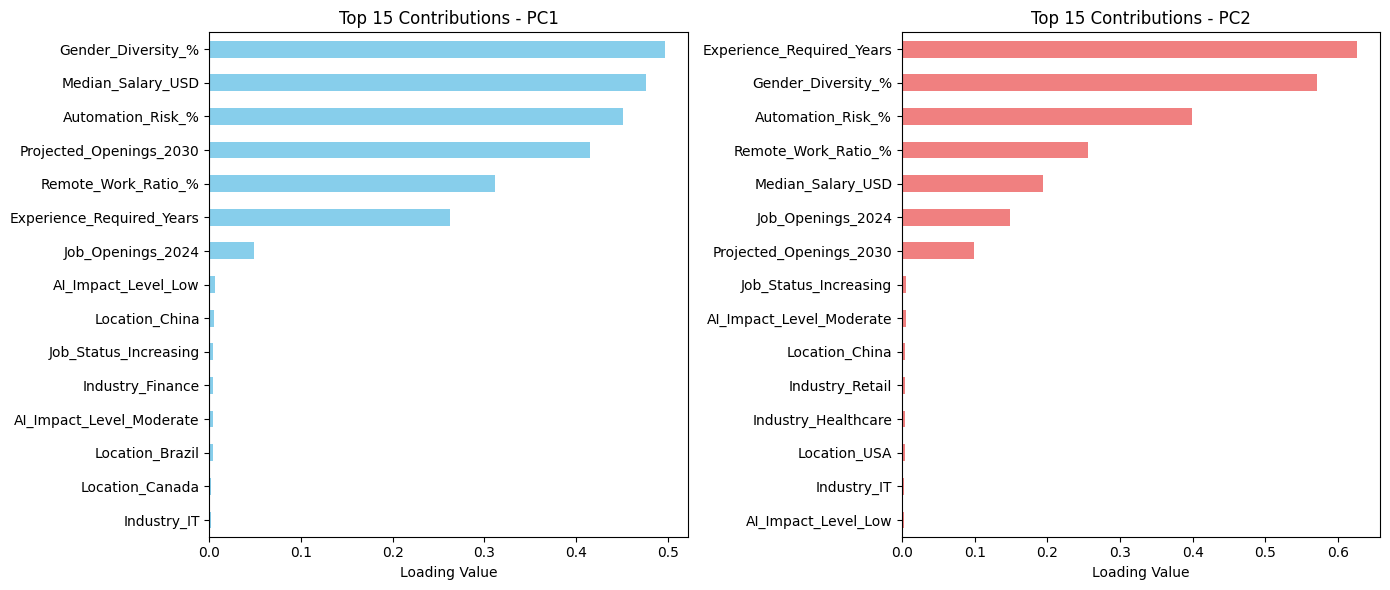

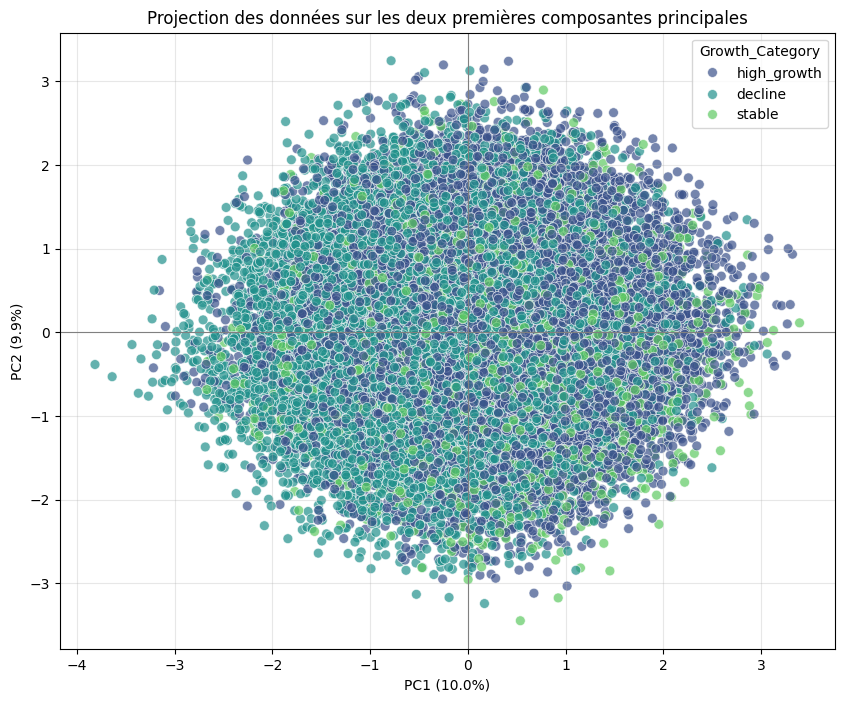

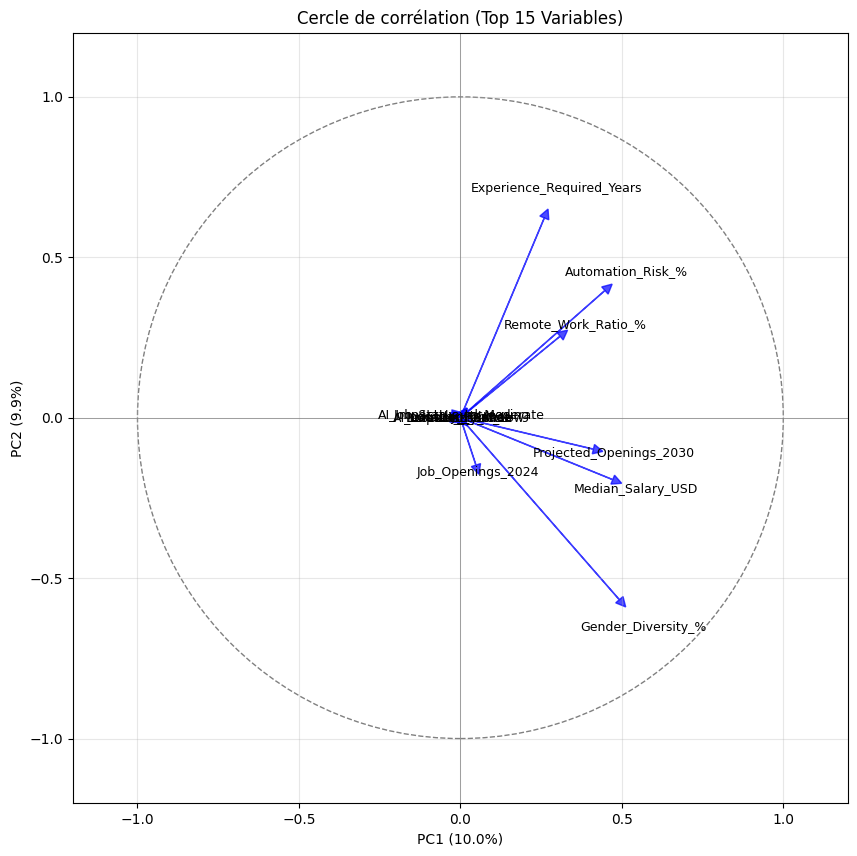

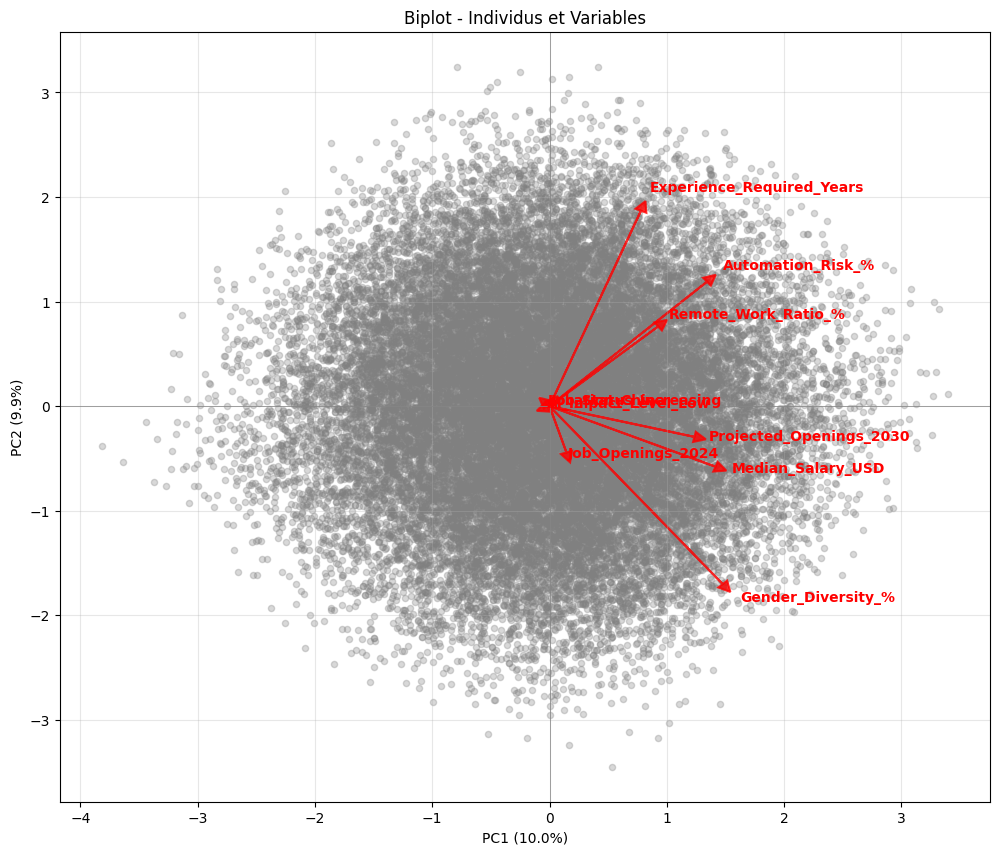


🎯 Recommendation finale: 4 composantes
📊 Variance expliquée: 39.5%
💾 Dataset réduit sauvegardé: dataset_reduit.csv

FINAL PCA RESULTS SUMMARY
Simple PCA shape: (30000, 299)
Comprehensive PCA shape: (30000, 9)
Original features: 665
Reduction: 98.6%

📋 Comprehensive PCA Dataset:


PC1       PC2       PC3       PC4              Job_Title  \
0 -1.171058 -0.179163  0.968941 -1.481716     Investment analyst   
1  1.626458  0.149965 -1.242855 -1.082302  Journalist, newspaper   
2  0.419570  0.277766  0.350576  0.861145      Financial planner   
3  0.921450  0.144996 -1.728397  0.746368        Legal secretary   
4  0.565968 -0.544543  0.830676 -0.296741  Aeronautical engineer   

  Growth_Category  Automation_Risk_%   Location       Industry  
0     high_growth              28.28         UK             IT  
1     high_growth              89.71        USA  Manufacturing  
2         decline              72.97     Canada        Finance  
3         decline              99.94  Australia     Healthcare  
4     high_growth              37.65    Germany             IT

In [26]:
# **PCA ANALYSIS**

# ======= SIMPLE PCA ======= 
def simple_pca(df_ready, n_components=0.95):
    """
    Perform PCA on numeric features and reduce dimensionality.
    n_components: float for % variance explained, or int for number of components
    """
    # 1. Keep only numeric columns
    df_numeric = df_ready.select_dtypes(include=[np.number]).fillna(0)
    print(f"🔢 Numeric features for PCA: {df_numeric.shape[1]}")

    # 2. Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df_numeric)
    
    # 3. Print variance explained
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    print(f"📊 Total variance explained by selected components: {cum_var[-1]*100:.2f}%")
    print(f"🎯 Number of components selected: {X_pca.shape[1]}")

    # 4. Scree plot / cumulative variance
    plt.figure(figsize=(8,4))
    plt.plot(range(1, len(cum_var)+1), cum_var*100, marker='o', color='blue', linewidth=2)
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative variance (%)")
    plt.title("PCA Explained Variance")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5. Scatter plot first two PCs
    plt.figure(figsize=(6,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='green')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA: PC1 vs PC2")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 6. Return PCA-transformed dataset
    df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    return df_pca, pca

# ======= COMPREHENSIVE PCA ANALYSIS =======
def comprehensive_pca_analysis(df_ready, df_engineered):
    """
    Perform complete PCA analysis with all TP-style visualizations
    """
    print("="*60)
    print("🎯 COMPREHENSIVE PCA ANALYSIS")
    print("="*60)
    
    # 1) Prepare data for PCA
    df_pca_input = df_ready.select_dtypes(include=[np.number]).fillna(0)
    X = df_pca_input.values
    feature_names = df_pca_input.columns.tolist()
    print(f"📊 Data for PCA: {X.shape[0]} rows x {X.shape[1]} features")
    
    # 2) Apply PCA
    pca = PCA()
    pca_components = pca.fit_transform(X)
    
    # 3) Explained variance table
    explained_variance = pca.explained_variance_ratio_
    eig = pd.DataFrame({
        "Dimension": [f"Dim{i+1}" for i in range(len(explained_variance))],
        "Variance expliquée": pca.explained_variance_,
        "% variance expliquée": np.round(explained_variance * 100, 2),
        "% cum. var. expliquée": np.round(np.cumsum(explained_variance) * 100, 2)
    })
    print("\n📈 Tableau des variances expliquées:")
    print(eig.head(15))
    
    # 4) Scree plot with Kaiser criterion
    eigenvalues = pca.explained_variance_
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b', linewidth=2)
    plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser (λ=1)')
    plt.title("Valeurs propres des composantes principales")
    plt.xlabel("Composante principale")
    plt.ylabel("Valeur propre")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5) Variable contributions (Loadings)
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    # Plot contributions for first two components
    plt.figure(figsize=(14, 6))
    
    # PC1 contributions (top 15)
    plt.subplot(1, 2, 1)
    loadings_df = pd.DataFrame(loadings[:, 0], index=feature_names, columns=['PC1'])
    top_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).head(15)
    top_pc1.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Top 15 Contributions - PC1')
    plt.xlabel('Loading Value')
    
    # PC2 contributions (top 15)
    plt.subplot(1, 2, 2)
    loadings_df_pc2 = pd.DataFrame(loadings[:, 1], index=feature_names, columns=['PC2'])
    top_pc2 = loadings_df_pc2['PC2'].abs().sort_values(ascending=False).head(15)
    top_pc2.sort_values().plot(kind='barh', color='lightcoral')
    plt.title('Top 15 Contributions - PC2')
    plt.xlabel('Loading Value')
    
    plt.tight_layout()
    plt.show()
    
    # 6) Projection on first two principal components
    pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
    
    # Add metadata for coloring if available
    metadata_options = ['Growth_Category', 'AI_Impact_Level', 'Industry']
    for meta in metadata_options:
        if meta in df_engineered.columns:
            pca_df[meta] = df_engineered[meta].values
            break  # Use first available metadata
    
    plt.figure(figsize=(10, 8))
    if 'Growth_Category' in pca_df.columns:
        sns.scatterplot(x='PC1', y='PC2', hue='Growth_Category', data=pca_df, palette='viridis', s=50, alpha=0.7)
    else:
        sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Projection des données sur les deux premières composantes principales')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 7) Correlation circle (Cercle de corrélation)
    pcs = pca.components_
    plt.figure(figsize=(10, 10))
    
    # Add correlation circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)
    plt.axhline(0, color='grey', linestyle='-', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='-', linewidth=0.5)
    
    # Plot top 15 variables for clarity
    top_vars = loadings_df['PC1'].abs().sort_values(ascending=False).head(15).index
    
    for var in top_vars:
        i = feature_names.index(var)
        plt.arrow(0, 0, pcs[0, i], pcs[1, i], 
                 head_width=0.03, head_length=0.03, color='blue', alpha=0.7)
        plt.text(pcs[0, i]*1.15, pcs[1, i]*1.15, var, 
                fontsize=9, ha='center', va='center')
    
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Cercle de corrélation (Top 15 Variables)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 8) Biplot (Individuals + Variables)
    plt.figure(figsize=(12, 10))
    
    # Plot individuals
    scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                         alpha=0.3, s=20, color='gray')
    
    # Plot variables (top 10)
    scale = 3
    top_vars_biplot = loadings_df['PC1'].abs().sort_values(ascending=False).head(10).index
    
    for var in top_vars_biplot:
        i = feature_names.index(var)
        plt.arrow(0, 0, pcs[0, i]*scale, pcs[1, i]*scale, 
                 head_width=0.1, head_length=0.1, color='red', alpha=0.8, linewidth=1.5)
        plt.text(pcs[0, i]*scale*1.1, pcs[1, i]*scale*1.1, var, 
                color='red', fontsize=10, fontweight='bold')
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
    plt.title('Biplot - Individus et Variables')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 9) Component selection and final dataset
    n_kaiser = (pca.explained_variance_ > 1).sum()
    n_85 = int(np.argmax(np.cumsum(explained_variance) >= 0.85) + 1)
    recommended = min(n_kaiser, n_85) if n_kaiser > 0 else n_85
    
    print(f"\n🎯 Recommendation finale: {recommended} composantes")
    print(f"📊 Variance expliquée: {np.cumsum(explained_variance)[recommended-1]*100:.1f}%")
    
    # Create final reduced dataset
    pca_reduced = pca_components[:, :recommended]
    reduced_cols = [f'PC{i+1}' for i in range(recommended)]
    dataset_reduit = pd.DataFrame(pca_reduced, columns=reduced_cols)
    
    # Add important metadata
    metadata_to_add = ['Job_Title', 'Growth_Category', 'Automation_Risk_%', 'Location', 'Industry']
    for meta in metadata_to_add:
        if meta in df_engineered.columns:
            dataset_reduit[meta] = df_engineered[meta].values
    
    # Save results
    dataset_reduit.to_csv(OUTPUT_PCA_CSV, index=False)
    print(f"💾 Dataset réduit sauvegardé: {OUTPUT_PCA_CSV}")
    
    return dataset_reduit, pca

# ======= EXECUTE BOTH PCA APPROACHES =======

print("🚀 SIMPLE PCA ANALYSIS")
print("="*40)
df_pca_simple, pca_simple = simple_pca(df_ready, n_components=0.95)

print("\n🚀 COMPREHENSIVE PCA ANALYSIS") 
print("="*40)
dataset_reduit, pca_model = comprehensive_pca_analysis(df_ready, df_engineered)

# Display final results
print("\n" + "="*50)
print("FINAL PCA RESULTS SUMMARY")
print("="*50)
print(f"Simple PCA shape: {df_pca_simple.shape}")
print(f"Comprehensive PCA shape: {dataset_reduit.shape}")
print(f"Original features: {df_ready.select_dtypes(include=[np.number]).shape[1]}")
print(f"Reduction: {((df_ready.select_dtypes(include=[np.number]).shape[1] - dataset_reduit.shape[1]) / df_ready.select_dtypes(include=[np.number]).shape[1] * 100):.1f}%")

print("\n📋 Comprehensive PCA Dataset:")
dataset_reduit.head()